In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [5]:
TABLE_PATH = './Ansatz_training_reports(CostaSH).csv'
KL_DIV_TABLE_PATH = '../circuits/CostaSH/klMeasures.csv'

## Get the data

In [289]:
performance_df = pd.read_csv(TABLE_PATH)
ansatz_df = pd.read_csv(KL_DIV_TABLE_PATH)

In [290]:
ansatz_df

,Qubits,name,Layers,num_params,KL divergence
0,1,hr,1,3,0.041942
1,1,ru,1,3,0.045850
2,1,ruu,1,6,0.034767
3,1,rx,1,1,0.249244
4,1,ry,1,1,0.233362
5,1,rz,1,1,4.317488
6,2,alpha,1,4,0.074536
7,2,beta,1,18,0.027473
8,2,gamma,1,4,0.483940
9,2,phi,1,4,0.085627


In [126]:
performance_df.duplicated().unique()

array([False])

In [291]:
merged_df = pd.merge(performance_df, ansatz_df, 
                    left_on='ARQUITETURA_ANSATZ', 
                    right_on='name', 
                    how='left')
merged_df.head()

,ARQUITETURA_ANSATZ,INPUT_EMBEDDING,DATASET,DATASET_DIVISION_INDEX,OPTIMIZER,UNSUPERVISED_METRIC,MEASURED_WIRES,MEASURE_TYPE,TRAIN_METRIC_COST,TEST_METRIC_COST,TRAIN_ACCURACY,TEST_ACCURACY,WEIGHT,BIAS,USE_BIAS,Qubits,name,Layers,num_params,KL divergence
0,hr,amplitude,blobs_2classes_2features_500samples_low_noise,0,SPSAOptimizer(10),silhouette,1,expval,0.687974,0.707721,0.388892,0.357417,[ 0.46310958 1.51730179 -0.8685384 ],[0.26964764],YES,1,hr,1,3,0.041942
1,hr,amplitude,blobs_2classes_2features_500samples_low_noise,0,SPSAOptimizer(10),calinski harabasz,1,expval,10.000000,10.000000,0.000000,0.000000,[-7.88769834 -6.84109828 7.89266777],[-8.1856726],YES,1,hr,1,3,0.041942
2,hr,amplitude,blobs_2classes_2features_500samples_low_noise,1,SPSAOptimizer(10),silhouette,1,expval,0.685815,0.725449,0.409554,0.357371,[ 0.49662902 1.46714475 -0.88130919],[0.29223773],YES,1,hr,1,3,0.041942
3,hr,amplitude,blobs_2classes_2features_500samples_low_noise,1,SPSAOptimizer(10),calinski harabasz,1,expval,10.000000,10.000000,0.000000,0.000000,[ 78.22535209 -76.49117364 -78.70308033],[77.84363186],YES,1,hr,1,3,0.041942
4,hr,amplitude,blobs_2classes_2features_500samples_low_noise,2,SPSAOptimizer(10),silhouette,1,expval,0.752375,0.691396,0.293520,0.392557,[ 0.49948276 1.45020381 -0.85730261],[0.21516058],YES,1,hr,1,3,0.041942


In [292]:
import re

# Sample data (replace with your actual DataFrame)
data = {
    'dataset': [
        'blobs_2classes_2features_500samples_no_noise',
        'blobs_3classes_4features_50samples_low_noise',
        'circles_50samples_low_noise',
        'moons_2classes_100samples_medium_noise',
        'custom_3classes_8features_200samples_high_noise'
    ]
}
df = pd.DataFrame(data)

def parse_dataset_name(name):
    #defaults
    num_classes = 2
    num_features = 2
    num_samples = -1
    noise_level = 'no_noise'
    
    dataset_type = name.split('_')[0]
    
    class_match = re.search(r'(\d+)classes', name)
    feature_match = re.search(r'(\d+)features', name)
    sample_match = re.search(r'(\d+)samples', name)
    noise_match = re.search(r'(no|low|medium|high)_noise', name)
    
    if class_match:   num_classes  = int(class_match.group(1))
    if feature_match: num_features = int(feature_match.group(1))
    if sample_match:  num_samples  = int(sample_match.group(1))
    if noise_match:   noise_level  = noise_match.group(1) + '_noise'
    
    return pd.Series({
        'dataset_type': dataset_type,
        'num_classes': num_classes,
        'num_features': num_features,
        'num_samples': num_samples,
        'noise_level': noise_level
    })


complete_df = pd.concat([
    merged_df, 
    merged_df['DATASET'].apply(parse_dataset_name)
], axis=1)

noise_order = ['no_noise', 'low_noise'] #, 'medium_noise', 'high_noise']
complete_df['noise_level'] = pd.Categorical(complete_df['noise_level'], categories=noise_order, ordered=True)

complete_df = complete_df.dropna()
complete_df = complete_df.drop(columns=['BIAS',  'WEIGHT'])
complete_df

,ARQUITETURA_ANSATZ,INPUT_EMBEDDING,DATASET,DATASET_DIVISION_INDEX,OPTIMIZER,UNSUPERVISED_METRIC,MEASURED_WIRES,MEASURE_TYPE,TRAIN_METRIC_COST,TEST_METRIC_COST,...,Qubits,name,Layers,num_params,KL divergence,dataset_type,num_classes,num_features,num_samples,noise_level
0,hr,amplitude,blobs_2classes_2features_500samples_low_noise,0,SPSAOptimizer(10),silhouette,1,expval,0.687974,0.707721,...,1,hr,1,3,0.041942,blobs,2,2,500,low_noise
1,hr,amplitude,blobs_2classes_2features_500samples_low_noise,0,SPSAOptimizer(10),calinski harabasz,1,expval,10.000000,10.000000,...,1,hr,1,3,0.041942,blobs,2,2,500,low_noise
2,hr,amplitude,blobs_2classes_2features_500samples_low_noise,1,SPSAOptimizer(10),silhouette,1,expval,0.685815,0.725449,...,1,hr,1,3,0.041942,blobs,2,2,500,low_noise
3,hr,amplitude,blobs_2classes_2features_500samples_low_noise,1,SPSAOptimizer(10),calinski harabasz,1,expval,10.000000,10.000000,...,1,hr,1,3,0.041942,blobs,2,2,500,low_noise
4,hr,amplitude,blobs_2classes_2features_500samples_low_noise,2,SPSAOptimizer(10),silhouette,1,expval,0.752375,0.691396,...,1,hr,1,3,0.041942,blobs,2,2,500,low_noise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28855,L,phasex,blobs_3classes_4features_500samples_low_noise,2,SPSAOptimizer(10),calinski harabasz,1,expval,0.668053,0.570421,...,4,L,1,12,0.239632,blobs,3,4,500,low_noise
28856,L,phasex,blobs_3classes_4features_500samples_low_noise,3,SPSAOptimizer(10),silhouette,1,expval,1.034327,1.056910,...,4,L,1,12,0.239632,blobs,3,4,500,low_noise
28857,L,phasex,blobs_3classes_4features_500samples_low_noise,3,SPSAOptimizer(10),calinski harabasz,1,expval,0.699408,4.230354,...,4,L,1,12,0.239632,blobs,3,4,500,low_noise
28858,L,phasex,blobs_3classes_4features_500samples_low_noise,4,SPSAOptimizer(10),silhouette,1,expval,1.108029,1.128998,...,4,L,1,12,0.239632,blobs,3,4,500,low_noise


# sla

In [ ]:

corr_test,  p_test  = pearsonr(complete_df['KL divergence'], complete_df['TEST_ACCURACY'])
corr_train, p_train = pearsonr(complete_df['KL divergence'], complete_df['TRAIN_ACCURACY'])
print(f"Test  Accuracy vs KL Divergence - Correlation: {corr_test:.3f}, p-value: {p_test:.3f}")
print(f"Train Accuracy vs KL Divergence - Correlation: {corr_train:.3f}, p-value: {p_train:.3f}")


Test  Accuracy vs KL Divergence - Correlation: -0.010, p-value: 0.097
Train Accuracy vs KL Divergence - Correlation: -0.010, p-value: 0.093


Nos dados gerais, há baixa correlação entre a KL divergence e a acurácia.

In [154]:

analise_df = complete_df[ (complete_df['USE_BIAS'] == 'NO') & (complete_df['KL divergence'] < 1) ]
corr_test,  p_test  = pearsonr(analise_df['KL divergence'], analise_df['TEST_ACCURACY'])
corr_train, p_train = pearsonr(analise_df['KL divergence'], analise_df['TRAIN_ACCURACY'])
print(f"Test  Accuracy vs KL Divergence - Correlation: {corr_test:.3f}, p-value: {p_test}")
print(f"Train Accuracy vs KL Divergence - Correlation: {corr_train:.3f}, p-value: {p_train}")

Test  Accuracy vs KL Divergence - Correlation: -0.084, p-value: 2.1030358597542718e-22
Train Accuracy vs KL Divergence - Correlation: -0.094, p-value: 6.651921837142929e-28


In [389]:
less_df = (complete_df[complete_df['USE_BIAS'] == 'YES'])[['name', 'dataset_type', 'UNSUPERVISED_METRIC', 'num_classes', 'num_features', 'noise_level', 'TRAIN_ACCURACY', 'TEST_ACCURACY', 'KL divergence',]].copy()
less_df = less_df.groupby(['name', 'dataset_type', 'UNSUPERVISED_METRIC', 'num_classes', 'num_features', 'noise_level'], observed=True).mean().reset_index()

# If you want more statistics than just the mean
detailed_stats = (less_df.groupby(['name', 'dataset_type', 'UNSUPERVISED_METRIC','num_classes', 'num_features', 'noise_level'], observed=True)
                  .agg({'TRAIN_ACCURACY': ['mean', 'std', 'count'],
                       'TEST_ACCURACY': ['mean', 'std'],
                       'KL divergence': ['mean', 'min', 'max']})
                  .round(4)
                  .reset_index())

# # less_df
# detailed_stats

In [397]:
from scipy.stats import f_oneway
numeric_cols = ['TRAIN_METRIC_COST', 'TEST_METRIC_COST', 
                'TRAIN_ACCURACY', 'TEST_ACCURACY',]

def anova_test(df, categorical_col, numeric_col):
    groups = [group[numeric_col].dropna() 
              for name, group in df.groupby(categorical_col)]
    f_val, p_val = f_oneway(*groups)
    return f_val, p_val

# Example usage:
for col in ['INPUT_EMBEDDING', 'UNSUPERVISED_METRIC', 'dataset_type']:
    for num in numeric_cols:
        f_val, p_val = anova_test(complete_df, col, num)
        print(f"{col} vs {num} { ' ' * (40 - len(col) - len(num))  } p-value: {p_val:.8f} | f_val: {f_val:.6f} ")

INPUT_EMBEDDING vs TRAIN_METRIC_COST          p-value: 0.00067741 | f_val: 11.552799 
INPUT_EMBEDDING vs TEST_METRIC_COST           p-value: 0.00000000 | f_val: 100.799632 
INPUT_EMBEDDING vs TRAIN_ACCURACY             p-value: 0.00000000 | f_val: 13049.606157 
INPUT_EMBEDDING vs TEST_ACCURACY              p-value: 0.00000000 | f_val: 10958.342241 
UNSUPERVISED_METRIC vs TRAIN_METRIC_COST      p-value: 0.00000000 | f_val: 37.168133 
UNSUPERVISED_METRIC vs TEST_METRIC_COST       p-value: 0.00000000 | f_val: 186.169503 
UNSUPERVISED_METRIC vs TRAIN_ACCURACY         p-value: 0.00000000 | f_val: 39.410959 
UNSUPERVISED_METRIC vs TEST_ACCURACY          p-value: 0.00003168 | f_val: 17.319790 
dataset_type vs TRAIN_METRIC_COST             p-value: 0.00000886 | f_val: 8.721601 
dataset_type vs TEST_METRIC_COST              p-value: 0.00098949 | f_val: 5.431010 
dataset_type vs TRAIN_ACCURACY                p-value: 0.00000000 | f_val: 741.995168 
dataset_type vs TEST_ACCURACY                 p

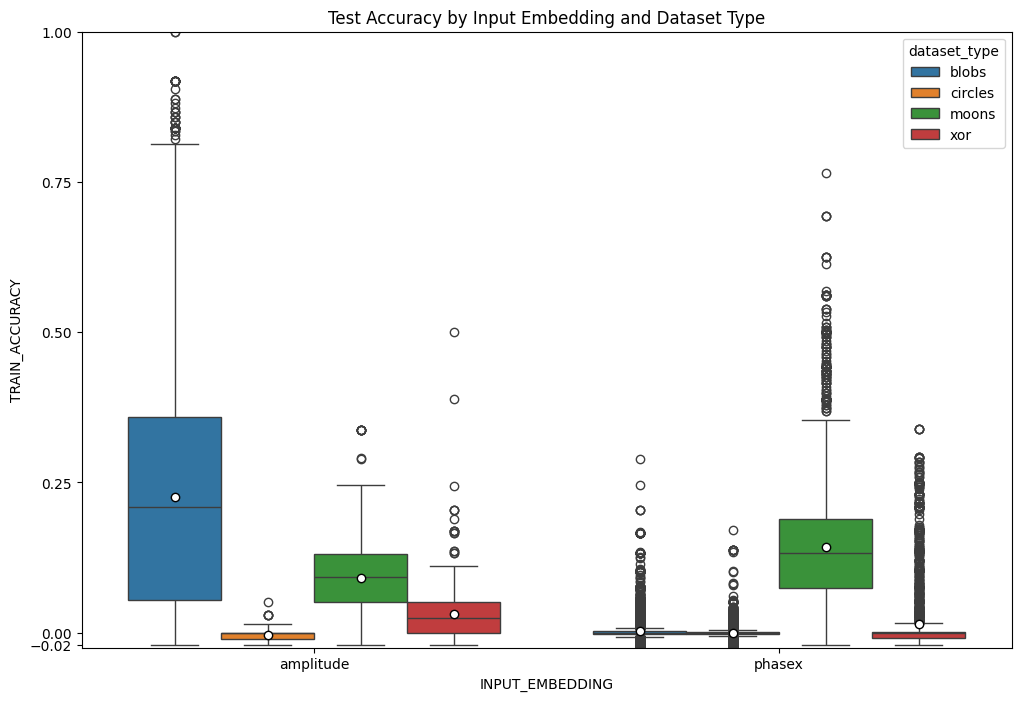

In [ ]:
numeric_cols = ['TRAIN_METRIC_COST', 'TEST_METRIC_COST', 
                'TRAIN_ACCURACY', 'TEST_ACCURACY',
                'Qubits', 'num_params', 'KL divergence',
                'num_classes', 'num_features', 'num_samples']

## Plots

In [381]:
print(list(complete_df.columns))

['ARQUITETURA_ANSATZ', 'INPUT_EMBEDDING', 'DATASET', 'DATASET_DIVISION_INDEX', 'OPTIMIZER', 'UNSUPERVISED_METRIC', 'MEASURED_WIRES', 'MEASURE_TYPE', 'TRAIN_METRIC_COST', 'TEST_METRIC_COST', 'TRAIN_ACCURACY', 'TEST_ACCURACY', 'USE_BIAS', 'Qubits', 'name', 'Layers', 'num_params', 'KL divergence', 'dataset_type', 'num_classes', 'num_features', 'num_samples', 'noise_level']


In [384]:
complete_df.describe()

,DATASET_DIVISION_INDEX,MEASURED_WIRES,TRAIN_METRIC_COST,TEST_METRIC_COST,TRAIN_ACCURACY,TEST_ACCURACY,Qubits,Layers,num_params,KL divergence,num_classes,num_features,num_samples
count,28080.000000,28080.0,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.0,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000
mean,2.000000,1.0,2.242920,2.069698,0.085934,0.081093,3.179487,1.0,13.948718,1.016850,2.692308,4.649573,275.000000
std,1.414239,0.0,37.378234,14.552879,0.150498,0.151891,1.009506,0.0,10.331322,4.771303,0.821328,4.676477,225.004007
min,0.000000,1.0,0.001160,0.002137,-0.027274,-0.066043,1.000000,1.0,1.000000,0.012029,2.000000,2.000000,50.000000
25%,1.000000,1.0,0.284119,0.441745,-0.000563,-0.002486,3.000000,1.0,6.000000,0.040045,2.000000,2.000000,50.000000
50%,2.000000,1.0,0.872810,0.901733,0.003019,0.003879,4.000000,1.0,12.000000,0.089093,2.000000,2.000000,275.000000
75%,3.000000,1.0,1.025370,1.045124,0.127356,0.129227,4.000000,1.0,18.000000,0.330738,3.000000,4.000000,500.000000
max,4.000000,1.0,5349.343576,1555.969696,1.000000,1.000000,4.000000,1.0,44.000000,30.222417,4.000000,16.000000,500.000000


In [94]:
ansatz_order = ansatz_df.sort_values(['KL divergence'])['name'].unique()
ansatz_order

array(['M', 'O', 'G', '9_divwe', 'D', 'beta', '5_tano', 'ruu', '8_nake',
       'I', 'hr', 'K', 'ru', '4_wana', 'N', 'alpha', 'phi', 'J', 'theta',
       'C', '2_yadi', '3_tatu', '7_sambwadi', 'ry', 'L', 'rx', 'A', 'H',
       'B', 'E', 'gamma', '0_zero', 'F', '1_mochi', 'rz', '6_samanu'],
      dtype=object)

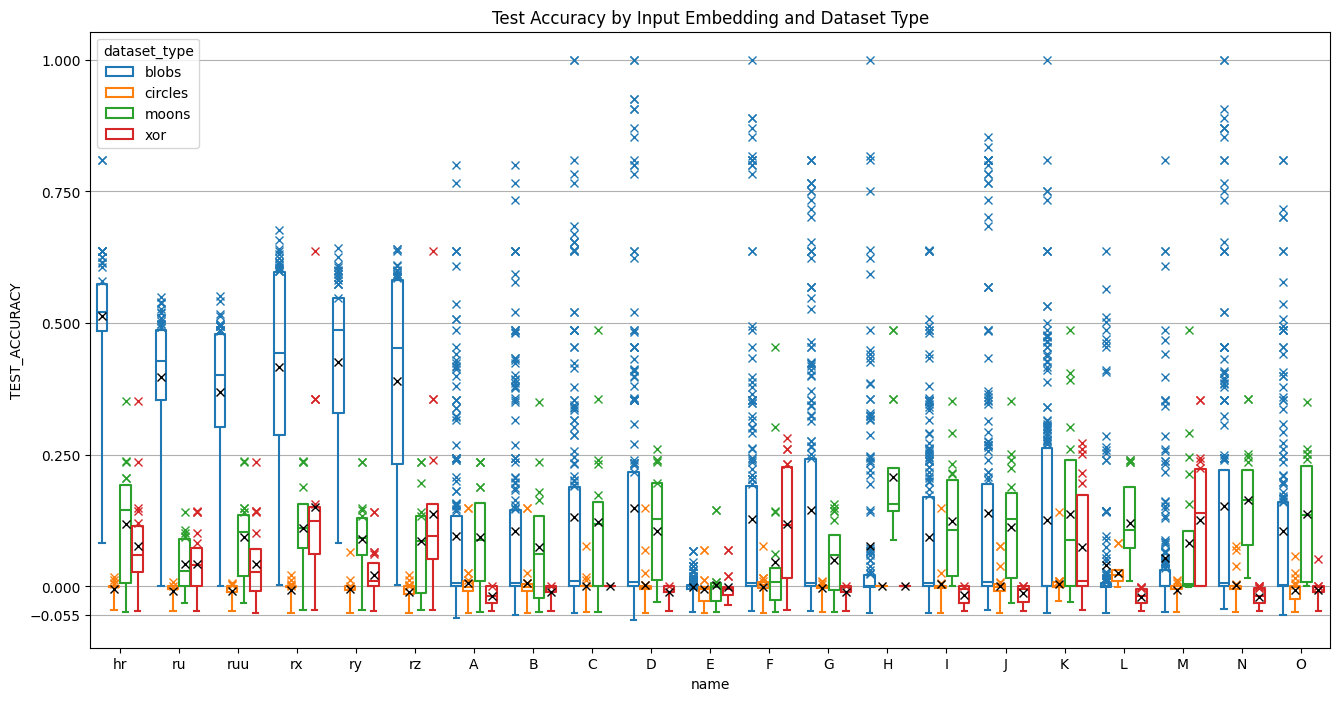

In [550]:
filtro = (complete_df['USE_BIAS'] == 'YES') & (complete_df['Qubits'] % 3 == 1) & (complete_df['noise_level'] == 'no_noise')
df_to_plot = complete_df[filtro]

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_to_plot,
    x='name',
    y='TEST_ACCURACY',
    hue='dataset_type',
    fill=False,
    gap=0.1,
    whis=(0, 2),
    flierprops={"marker": "x"},
    showmeans=True, meanprops={"marker":"x", "markeredgecolor":"black"}
)

plt.title("Test Accuracy by Input Embedding and Dataset Type")
# plt.ylim(-0.025, 1)
plt.yticks([-0.055, 0, 0.25, 0.5, 0.75, 1])
plt.grid(True, axis='y')
plt.show()

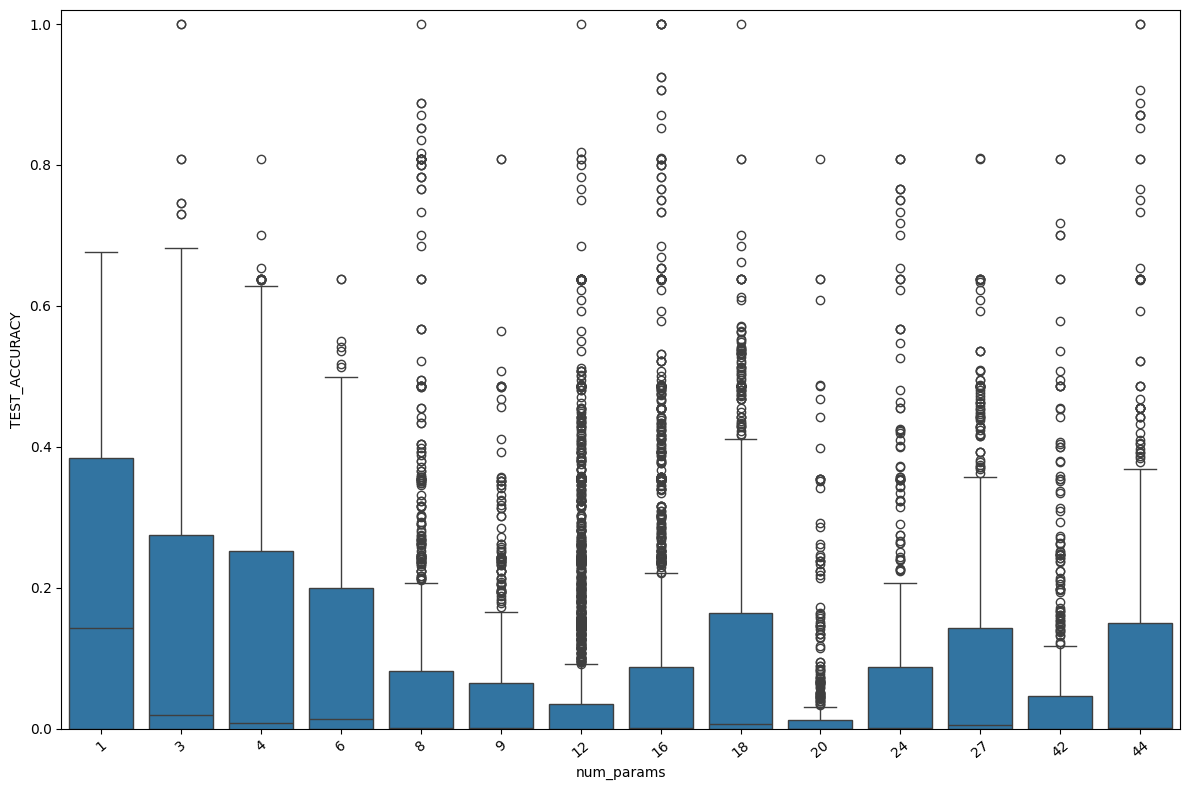

In [559]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[ filtro ]
ansatz_order = ansatz_df.sort_values(['KL divergence'])['name']

plt.figure(figsize=(12, 8))
scatter = sns.boxplot(data=df_to_plot, x='num_params', y='TEST_ACCURACY', 
                        #   hue='INPUT_EMBEDDING',
                        #   jitter=0.3,
                        #   palette=sns.color_palette(n_colors=2),
                        #   order=ansatz_order,
                          )
plt.xticks(rotation=40)
# Set x-axis limits
# plt.xlim(0, 0.65)
plt.ylim(0, 1.02)
# plt.xscale('log')
# plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center',ncol=2 )
# plt.title('Test Accuracy by Ansatz ordered by KL Divergence')
# plt.xlabel('Ansatz ordered by KL Divergence')
# plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

# Final Plots

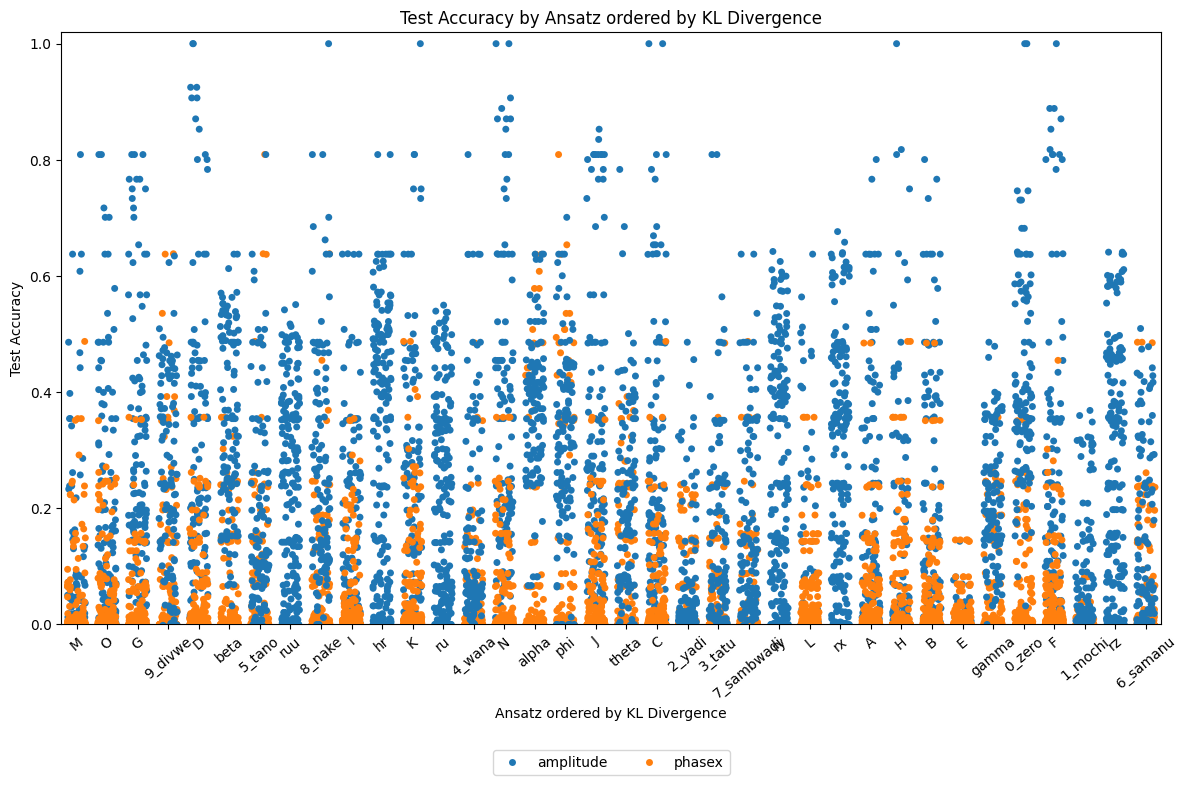

In [388]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[ filtro ]
ansatz_order = ansatz_df.sort_values(['KL divergence'])['name']

plt.figure(figsize=(12, 8))
scatter = sns.stripplot(data=df_to_plot, x='name', y='TEST_ACCURACY', 
                          hue='INPUT_EMBEDDING',
                          jitter=0.3,
                          palette=sns.color_palette(n_colors=2),
                          order=ansatz_order,
                          )
plt.xticks(rotation=40)
# Set x-axis limits
# plt.xlim(0, 0.65)
plt.ylim(0, 1.02)
# plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center',ncol=2 )
plt.title('Test Accuracy by Ansatz ordered by KL Divergence')
plt.xlabel('Ansatz ordered by KL Divergence')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

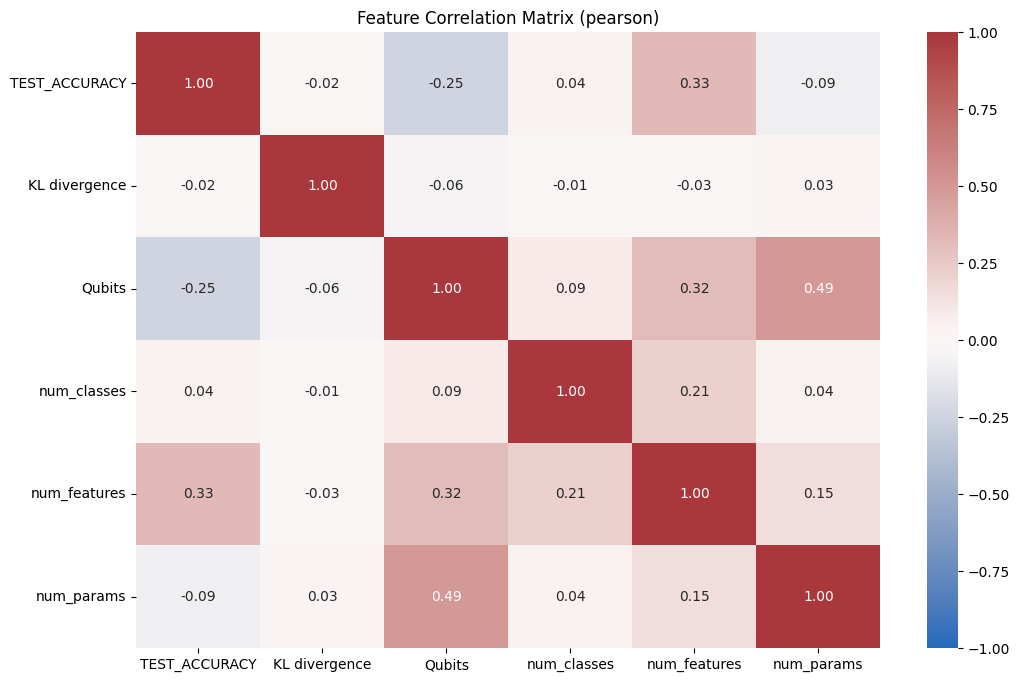

In [294]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[ filtro ]
numeric_cols = ['TEST_ACCURACY', 'KL divergence', 'Qubits', 'num_classes', 'num_features', 'num_params']

plt.figure(figsize=(12, 8))
corr_matrix = df_to_plot[numeric_cols].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='vlag', center=0, fmt=".2f", vmin=-1)
plt.title("Feature Correlation Matrix (pearson)")
plt.show()

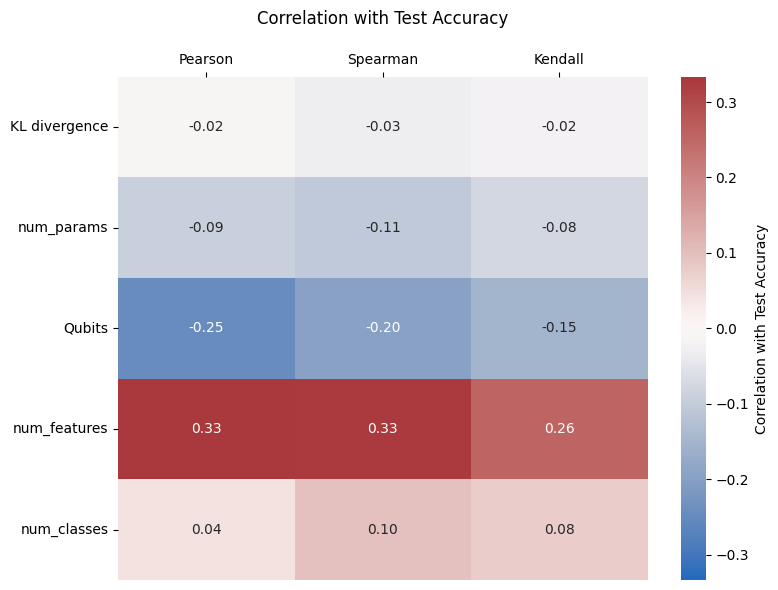

In [299]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[filtro]

numeric_cols = ['TEST_ACCURACY', 'KL divergence', 'num_params', 'Qubits', 'num_features', 'num_classes']

# Calculate correlation matrix
corr_matrix   =   df_to_plot[numeric_cols].corr(method='pearson')[['TEST_ACCURACY']].rename(columns={'TEST_ACCURACY': 'Pearson'})
corr_matrix = corr_matrix.join( df_to_plot[numeric_cols].corr(method='spearman')[['TEST_ACCURACY']].rename(columns={'TEST_ACCURACY': 'Spearman'}) )
corr_matrix = corr_matrix.join( df_to_plot[numeric_cols].corr(method='kendall')[['TEST_ACCURACY']].rename(columns={'TEST_ACCURACY': 'Kendall'}) )

corr_matrix = corr_matrix.drop('TEST_ACCURACY')

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', center=0, fmt=".2f", 
            vmin=-1/3, vmax=1/3, cbar_kws={'label': 'Correlation with Test Accuracy'})

plt.title("Correlation with Test Accuracy\n")
# plt.yticks(rotation=0)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()

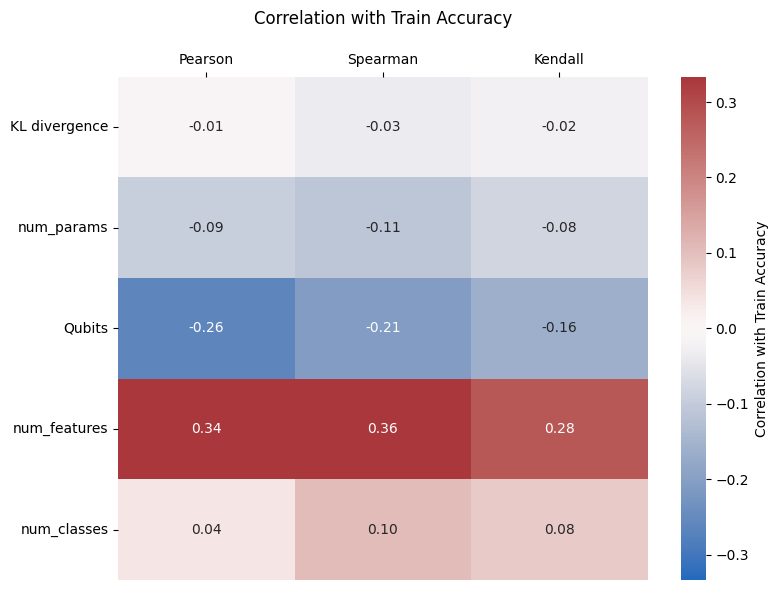

In [300]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[filtro]

numeric_cols = ['TRAIN_ACCURACY', 'KL divergence', 'num_params', 'Qubits', 'num_features', 'num_classes']

# Calculate correlation matrix
corr_matrix   =   df_to_plot[numeric_cols].corr(method='pearson')[['TRAIN_ACCURACY']].rename(columns={'TRAIN_ACCURACY': 'Pearson'})
corr_matrix = corr_matrix.join( df_to_plot[numeric_cols].corr(method='spearman')[['TRAIN_ACCURACY']].rename(columns={'TRAIN_ACCURACY': 'Spearman'}) )
corr_matrix = corr_matrix.join( df_to_plot[numeric_cols].corr(method='kendall')[['TRAIN_ACCURACY']].rename(columns={'TRAIN_ACCURACY': 'Kendall'}) )

corr_matrix = corr_matrix.drop('TRAIN_ACCURACY')

# Create the plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', center=0, fmt=".2f", 
            vmin=-1/3, vmax=1/3, cbar_kws={'label': 'Correlation with Train Accuracy'})

plt.title("Correlation with Train Accuracy\n")
# plt.yticks(rotation=0)
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.tight_layout()
plt.show()

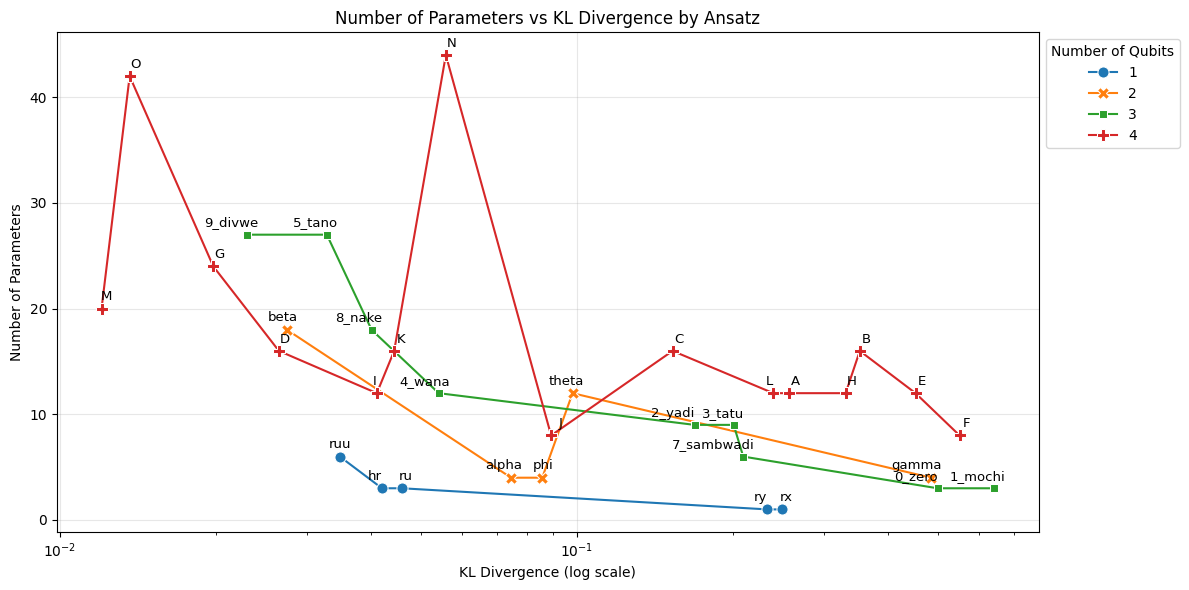

In [513]:
df_to_plot = ansatz_df[ansatz_df['KL divergence'] < 2]
plt.figure(figsize=(12, 6))

lineplot = sns.lineplot(
    data=df_to_plot,
    x='KL divergence',
    y='num_params',
    hue='Qubits',
    style='Qubits',
    markers=True,
    dashes=False,
    markersize=8,
    legend='full',
    palette=sns.color_palette(n_colors=4),
)

recuar = {'L', 'hr', 'ry', '0_zero', '2_yadi', 'I', }

for i, row in df_to_plot.iterrows():
    plt.text(
        row['KL divergence'] * (1.05 if row['name'] not in recuar else 1),
        row['num_params']+0.5,
        row['name'],
        fontsize=9.5,
        ha='right',
        va='bottom',
    )
# 
plt.xscale('log')
plt.title('Number of Parameters vs KL Divergence by Ansatz')
plt.xlabel('KL Divergence (log scale)')
plt.ylabel('Number of Parameters')
plt.grid(True, alpha=0.3)
plt.legend(title='Number of Qubits',bbox_to_anchor=(1, 1),loc='upper left')

plt.tight_layout()
plt.show()

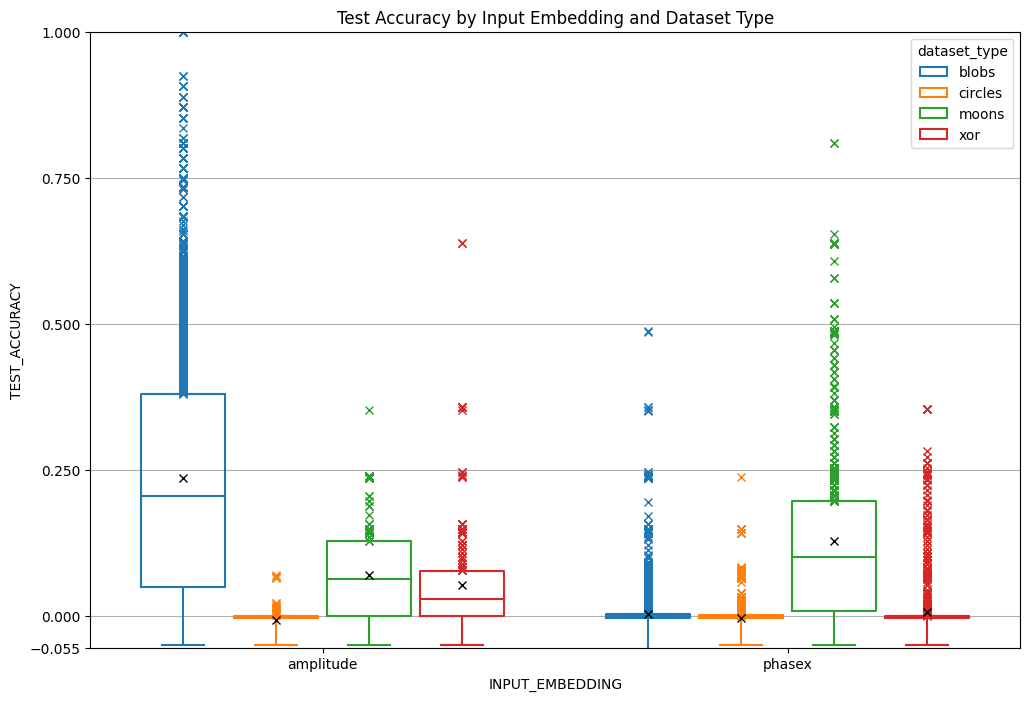

In [507]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[filtro]

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_to_plot,
    x='INPUT_EMBEDDING',
    y='TEST_ACCURACY',
    hue='dataset_type',
    fill=False,
    gap=0.1,
    whis=(0, 2),
    flierprops={"marker": "x"},
    showmeans=True, meanprops={"marker":"x", "markeredgecolor":"black"}
)

plt.title("Test Accuracy by Input Embedding and Dataset Type")
plt.ylim(-0.025, 1)
plt.yticks([-0.055, 0, 0.25, 0.5, 0.75, 1])
plt.grid(True, axis='y')
plt.show()

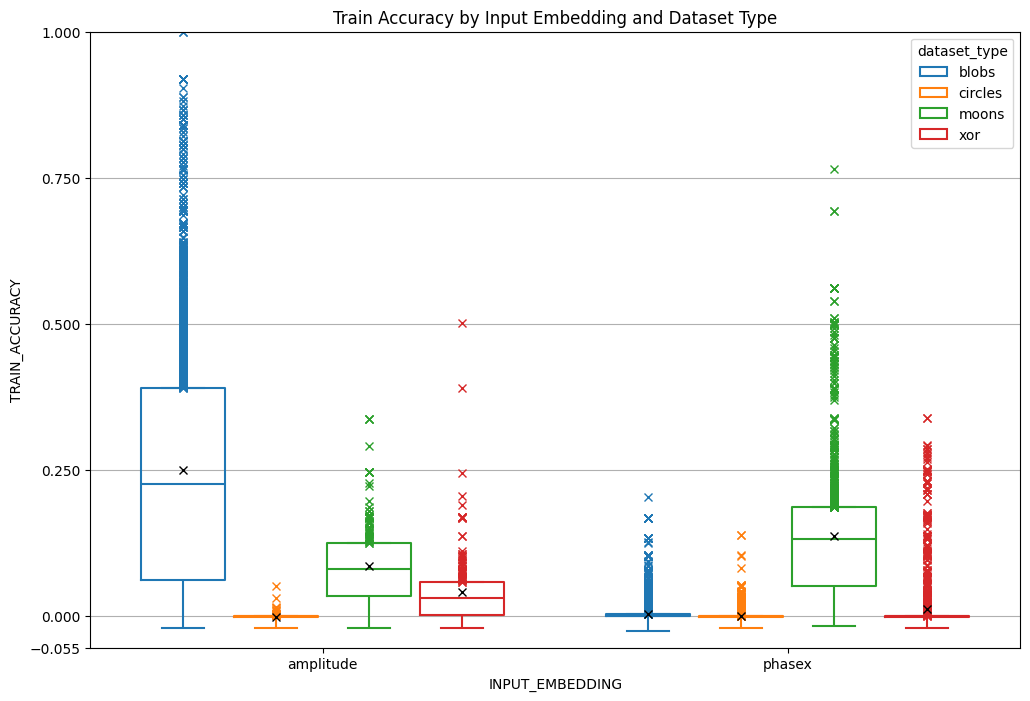

In [509]:
filtro = (complete_df['USE_BIAS'] == 'YES')
df_to_plot = complete_df[filtro]


plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_to_plot,
    x='INPUT_EMBEDDING',
    y='TRAIN_ACCURACY',
    hue='dataset_type',
    fill=False,
    gap=0.1,
    whis=(0, 2),
    flierprops={"marker": "x"},
    showmeans=True, meanprops={"marker":"x", "markeredgecolor":"black"}
)

plt.title("Train Accuracy by Input Embedding and Dataset Type")
plt.ylim(-0.025, 1)
plt.yticks([-0.055, 0, 0.25, 0.5, 0.75, 1])
plt.grid(True, axis='y')
plt.show()